In [1]:
%load_ext autoreload
%autoreload 2

In [161]:

import gym
from agents.DQN import DQN
from networks.standard_network import standardNN
from networks.basic_network import basicNN
import gym
from typing import Union
import numpy as np
from environments.easy import easy_env
from agents.DQN_RS import DQN_RS

In [20]:
from matplotlib import pyplot as plt
def moving_average(x, window_length: Union[int, None] = None) -> np.ndarray:
    if window_length is None:
        window_length = max(len(x) // 50, 1)
    return np.convolve(x, np.ones(window_length), "valid") / window_length

def plot_results(test_rewards):
    ma_rewards = moving_average(test_rewards)
    plt.plot(ma_rewards, label="rewards")
    plt.show()

In [119]:
env = gym.make('Blackjack-v1', new_step_api=True)


try:
    n_obs = env.reset().size
except AttributeError:
    try: n_obs = env.observation_space.n
    except AttributeError:
        print('oh no, n_obs unknown')

try: n_actions = env.action_space.n
except AttributeError:
    print('oh no, n_obs unknown')

oh no, n_obs unknown


In [123]:
env.reset()

(21, 6, True)

In [124]:
n_obs = 3

In [158]:
# network1 = basicNN(n_obs, n_actions)
network1 = standardNN(n_obs, n_actions)
max_games = 10000
agent = DQN(
    network1,
    n_actions,
    n_obs,
    env,
    max_games=max_games,
    min_epsilon=0.1,
    lr=1e-2,
    alpha=0.1,
    gamma=0.99,
    mini_batch_size=12,
    games_to_decay_epsilon_for=max_games // 2,
    state_type='d'
)

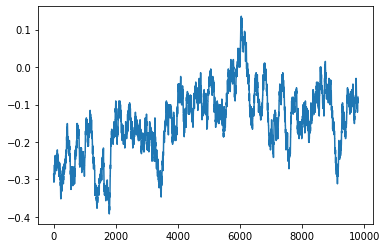

In [159]:
agent.play_games()
total_rewards = [i[-1] for i in agent.reward_averages]
plot_results(total_rewards)

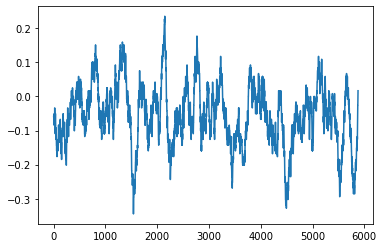

{0: 5336, 1: 3412}
-0.05368456152050684


In [162]:
agent.evaluation_mode = True
agent.play_games(5000)
total_rewards = [i[-1] for i in agent.evaluation_reward_averages]
plot_results(total_rewards)
print(agent.evaluation_action_counts)
print(sum(total_rewards) / len(total_rewards))
agent.evaluation_mode = False

In [165]:
# network1 = basicNN(n_obs, n_actions)
network1 = standardNN(n_obs, n_actions)
max_games = 10000
agent = DQN_RS(
    network1,
    n_actions,
    n_obs,
    env,
    max_games=max_games,
    min_epsilon=0.1,
    lr=1e-2,
    alpha=0.1,
    gamma=0.99,
    mini_batch_size=12,
    games_to_decay_epsilon_for=max_games // 2,
    state_type='d'
)

[autoreload of agents.DQN_RS failed: Traceback (most recent call last):
  File "c:\Users\Charl\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\extensions\autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\Charl\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\extensions\autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\Charl\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\extensions\autoreload.py", line 377, in update_generic
    update(a, b)
  File "c:\Users\Charl\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\extensions\autoreload.py", line 329, in update_class
    if update_generic(old_obj, new_obj):
  File "c:\Users\Charl\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\extensions\autoreload.py", line 377, in update_generic
    update(a, b)
  File "c:\Users\Charl\AppData\Local\Programs\Python\Python310\li

TypeError: DQN_RS.__init__() got an unexpected keyword argument 'max_games'